In [19]:
import requests
import urllib.parse
import hashlib
import hmac
import time
import csv
import os
import json
import datetime
import matplotlib.pyplot as plt
import mplfinance as mpf
import pandas as pd

api_key = ''
secret_key = ''
api_url = "https://api.binance.us"
uri_path = "/api/v3/allOrders"

symbol = 'BTCUSDT'
limit = 1000

data = {
    "timestamp": int(round(time.time() * 1000)),
    "symbol": "BTCUSD"
}

# get binanceus signature
def get_binanceus_signature(data, secret):
    postdata = urllib.parse.urlencode(data)
    message = postdata.encode()
    byte_key = bytes(secret, 'UTF-8')
    mac = hmac.new(byte_key, message, hashlib.sha256).hexdigest()
    return mac

# Attaches auth headers and returns results of a POST request
def binanceus_request(uri_path, data, api_key, api_sec):
    headers = {}
    headers['X-MBX-APIKEY'] = api_key
    signature = get_binanceus_signature(data, api_sec)
    params={
        **data,
        "signature": signature,
        }
    req = requests.get((api_url + uri_path), params=params, headers=headers)
    return req.text

#Sample Request Output:
# [
#   {
#     "symbol": "BTCUSD",
#     "orderId": 221505,
#     "orderListId": -1,
#     "clientOrderId": "web_13fc402e44d2448c88c04ce4094fb9c6",
#     "price": "0.00000000",
#     "origQty": "1.00000000",
#     "executedQty": "1.00000000",
#     "cummulativeQuoteQty": "7155.37000000",
#     "status": "FILLED",
#     "timeInForce": "GTC",
#     "type": "MARKET",
#     "side": "BUY",
#     "stopPrice": "0.00000000",
#     "icebergQty": "0.00000000",
#     "time": 1678951342382,
#     "updateTime": 1678951342382,
#     "isWorking": true,
#     "workingTime": 1678951342382,
#     "origQuoteOrderQty": "0.00000000",
#     "selfTradePreventionMode": "NONE"
#   }
# ]

# Create a DataFrame to hold all data
all_data = pd.DataFrame()

# Start time - the timestamp for "2023-01-01 01:01:00"
start_time = int(datetime.datetime(2023, 7, 7, 1, 1).timestamp() * 1000)
end_time = int(datetime.datetime.now().timestamp() * 1000)

# while end_time > start_time:

data = {
    'symbol': symbol,
    'timestamp': int(round(time.time() * 1000)),
    'limit': limit,
    'startTime': start_time,
    'endTime': end_time
}

result = binanceus_request(uri_path, data, api_key, secret_key)
data = json.loads(result)
data_df = pd.DataFrame(data)

    # if data:  # Check if data is not empty
    #     df_temp = pd.DataFrame(data)
    #     all_data = pd.concat([all_data, df_temp])
    #     end_time = data[0]['time'] - 1 
# Rename and convert columns
# all_data.columns = []

# Save all data into a single CSV
# all_data.to_csv('All_Oreders_LONG_TERM.csv', index=False)
data_df.to_csv('All_Oreders_LONG_TERM.csv', index=False)


In [2]:
print(json.dumps(data, indent=4))

[
    {
        "symbol": "BTCUSDT",
        "orderId": 1041018815,
        "orderListId": -1,
        "clientOrderId": "RZkxYS23ZLY4CpXKCRUozG",
        "price": "0.00000000",
        "origQty": "0.00010000",
        "executedQty": "0.00010000",
        "cummulativeQuoteQty": "3.00026300",
        "status": "FILLED",
        "timeInForce": "GTC",
        "type": "MARKET",
        "side": "BUY",
        "stopPrice": "0.00000000",
        "icebergQty": "0.00000000",
        "time": 1688716872947,
        "updateTime": 1688716872947,
        "isWorking": true,
        "workingTime": 1688716872947,
        "origQuoteOrderQty": "0.00000000",
        "selfTradePreventionMode": "EXPIRE_MAKER"
    },
    {
        "symbol": "BTCUSDT",
        "orderId": 1041018824,
        "orderListId": -1,
        "clientOrderId": "RiXAQCWS59xUGVrxtlStQa",
        "price": "30001.75000000",
        "origQty": "0.00010000",
        "executedQty": "0.00010000",
        "cummulativeQuoteQty": "3.00017500",
   

In [11]:
print(data[0]['time'])
print(data[0]['time'] - 1)
print(data[-1]['time'])
print(len(data))

1688716872947
1688716872946
1688749882587
1000


In [7]:
import requests
import urllib.parse
import hashlib
import hmac
import time
import csv
import os
import json
import datetime
import matplotlib.pyplot as plt
import mplfinance as mpf
import pandas as pd

api_key = ''
secret_key = ''
api_url = "https://api.binance.us"
uri_path = "/api/v3/allOrders"

symbol = 'BTCUSDT'
limit = 1000

data = {
    "timestamp": int(round(time.time() * 1000)),
    "symbol": "BTCUSD"
}

# get binanceus signature
def get_binanceus_signature(data, secret):
    postdata = urllib.parse.urlencode(data)
    message = postdata.encode()
    byte_key = bytes(secret, 'UTF-8')
    mac = hmac.new(byte_key, message, hashlib.sha256).hexdigest()
    return mac

# Attaches auth headers and returns results of a POST request
def binanceus_request(uri_path, data, api_key, api_sec):
    headers = {}
    headers['X-MBX-APIKEY'] = api_key
    signature = get_binanceus_signature(data, api_sec)
    params={
        **data,
        "signature": signature,
        }
    req = requests.get((api_url + uri_path), params=params, headers=headers)
    return req.text

#Sample Request Output:
# [
#   {
#     "symbol": "BTCUSD",
#     "orderId": 221505,
#     "orderListId": -1,
#     "clientOrderId": "web_13fc402e44d2448c88c04ce4094fb9c6",
#     "price": "0.00000000",
#     "origQty": "1.00000000",
#     "executedQty": "1.00000000",
#     "cummulativeQuoteQty": "7155.37000000",
#     "status": "FILLED",
#     "timeInForce": "GTC",
#     "type": "MARKET",
#     "side": "BUY",
#     "stopPrice": "0.00000000",
#     "icebergQty": "0.00000000",
#     "time": 1678951342382,
#     "updateTime": 1678951342382,
#     "isWorking": true,
#     "workingTime": 1678951342382,
#     "origQuoteOrderQty": "0.00000000",
#     "selfTradePreventionMode": "NONE"
#   }
# ]

# Create a DataFrame to hold all data
all_data = pd.DataFrame()

# Start time - the timestamp for "2023-01-01 01:01:00"
start_time = int(datetime.datetime(2023, 7, 7, 1, 1).timestamp() * 1000)


end_time = int(datetime.datetime.now().timestamp() * 1000)
start_time = end_time - 1000*60*60

while end_time > start_time:

    data = {
        'symbol': symbol,
        'timestamp': int(round(time.time() * 1000)),
        'limit': limit,
        'startTime': start_time,
        'endTime': end_time
    }

    result = binanceus_request(uri_path, data, api_key, secret_key)
    data = json.loads(result)

    if data:  # Check if data is not empty
        df_temp = pd.DataFrame(data)
        all_data = pd.concat([all_data, df_temp])
        end_time = data[-1]['time'] - 1
        start_time = end_time - 1000*60
        # print time to see progress
        print(datetime.datetime.fromtimestamp(end_time/1000.0), end='\r')
# Rename and convert columns
# all_data.columns = []

# Save all data into a single CSV
all_data.to_csv('All_Oreders_LONG_TERM.csv', index=False)


KeyboardInterrupt: 

In [114]:
import requests
import urllib.parse
import hashlib
import hmac
import time
import csv
import os
import json
import datetime
import matplotlib.pyplot as plt
import mplfinance as mpf
import pandas as pd

api_key = ''
secret_key = ''
api_url = "https://api.binance.us"
uri_path = "/api/v3/allOrders"

symbol = 'BTCUSDT'
limit = 1000

data = {
    "timestamp": int(round(time.time() * 1000)),
    "symbol": "BTCUSD"
}

# get binanceus signature
def get_binanceus_signature(data, secret):
    postdata = urllib.parse.urlencode(data)
    message = postdata.encode()
    byte_key = bytes(secret, 'UTF-8')
    mac = hmac.new(byte_key, message, hashlib.sha256).hexdigest()
    return mac

# Attaches auth headers and returns results of a POST request
def binanceus_request(uri_path, data, api_key, api_sec):
    headers = {}
    headers['X-MBX-APIKEY'] = api_key
    signature = get_binanceus_signature(data, api_sec)
    params={
        **data,
        "signature": signature,
        }
    req = requests.get((api_url + uri_path), params=params, headers=headers)
    return req.text

#Sample Request Output:
# [
#   {
#     "symbol": "BTCUSD",
#     "orderId": 221505,
#     "orderListId": -1,
#     "clientOrderId": "web_13fc402e44d2448c88c04ce4094fb9c6",
#     "price": "0.00000000",
#     "origQty": "1.00000000",
#     "executedQty": "1.00000000",
#     "cummulativeQuoteQty": "7155.37000000",
#     "status": "FILLED",
#     "timeInForce": "GTC",
#     "type": "MARKET",
#     "side": "BUY",
#     "stopPrice": "0.00000000",
#     "icebergQty": "0.00000000",
#     "time": 1678951342382,
#     "updateTime": 1678951342382,
#     "isWorking": true,
#     "workingTime": 1678951342382,
#     "origQuoteOrderQty": "0.00000000",
#     "selfTradePreventionMode": "NONE"
#   }
# ]


# Start time - the timestamp for "2023-01-01 01:01:00"
start_time = int(datetime.datetime(2023, 7, 2, 1, 1).timestamp() * 1000) # The start date should be when you started trading
end_time = start_time + 24*60*60*1000 # plus 24 hours in milliseconds

# Create a DataFrame to hold all data
all_data = pd.DataFrame()

while True:
    data = {
        'symbol': symbol,
        'timestamp': int(round(time.time() * 1000)),
        'limit': limit,
        'startTime': start_time,
        'endTime': end_time
    }

    print('Fetching orders from', datetime.datetime.fromtimestamp(start_time/1000), 'to', datetime.datetime.fromtimestamp(end_time/1000))

    result = binanceus_request(uri_path, data, api_key, secret_key)
    data = json.loads(result)

    if not isinstance(data, list):
        print('Unexpected response:', data)
        break

    if not data:  # If data is empty, we've fetched all the orders
        break

    # Append new data to all_data DataFrame
    data_df = pd.DataFrame(data)
    all_data = pd.concat([all_data, data_df])

    # Update start_time and end_time for the next request
    start_time = data[-1]['time'] + 1
    end_time = min(int(datetime.datetime.now().timestamp() * 1000), start_time + 24*60*60*1000)  # plus 24 hours or current time whichever is smaller

all_data.to_csv('All_Orders_LONG_TERM.csv', index=False)




Fetching orders from 2023-07-02 01:01:00 to 2023-07-03 01:01:00
Fetching orders from 2023-07-03 00:12:34.310000 to 2023-07-04 00:12:34.310000
Fetching orders from 2023-07-03 12:53:12.690000 to 2023-07-04 12:53:12.690000
Fetching orders from 2023-07-03 21:47:08.495000 to 2023-07-04 21:47:08.495000
Fetching orders from 2023-07-04 13:46:00.973000 to 2023-07-05 13:46:00.973000
Fetching orders from 2023-07-04 23:48:02.152000 to 2023-07-05 23:48:02.152000
Fetching orders from 2023-07-05 23:47:02.750000 to 2023-07-06 23:47:02.750000
Fetching orders from 2023-07-06 14:37:02.148000 to 2023-07-07 14:37:02.148000
Fetching orders from 2023-07-07 03:43:08.060000 to 2023-07-08 03:43:08.060000
Fetching orders from 2023-07-07 12:40:59.501000 to 2023-07-08 12:40:59.501000
Fetching orders from 2023-07-08 10:01:18.061000 to 2023-07-08 13:30:38.115000
Fetching orders from 2023-07-08 13:24:05.200000 to 2023-07-08 13:30:38.450000


In [113]:
print(len(all_data))

7410


In [111]:
import pandas as pd

# Read the original CSV
data_df = pd.read_csv('All_Orders_LONG_TERM.csv')

# Filter filled orders
filled_orders = data_df[data_df['status'] == 'FILLED'].copy()

# Handle 'price' values as explained in your snippet
filled_orders.loc[filled_orders['price'] == 0.0, 'price'] = filled_orders['cummulativeQuoteQty'] / filled_orders['executedQty']
filled_orders['price'] = filled_orders['price'].astype(float)

# Save the filled orders to a new CSV
filled_orders.to_csv('Filled_Orders_LONG_TERM.csv', index=False)

# Calculate the total values of BUY and SELL orders
buy_orders = filled_orders[filled_orders['side'] == 'BUY']
sell_orders = filled_orders[filled_orders['side'] == 'SELL']

total_buy_value = (buy_orders['price'] * buy_orders['executedQty']).sum()
total_sell_value = (sell_orders['price'] * sell_orders['executedQty']).sum()

# Print the total values and their difference
print("Total BUY value:", total_buy_value)
print("Total SELL value:", total_sell_value)
print("Difference:",  total_sell_value-total_buy_value)
print(f"Percentage of gain: {(total_sell_value-total_buy_value)/total_buy_value*100}%")

Total BUY value: 11210.8088502
Total SELL value: 11881.538831
Difference: 670.7299808000007
Percentage of gain: 5.982886603119943%


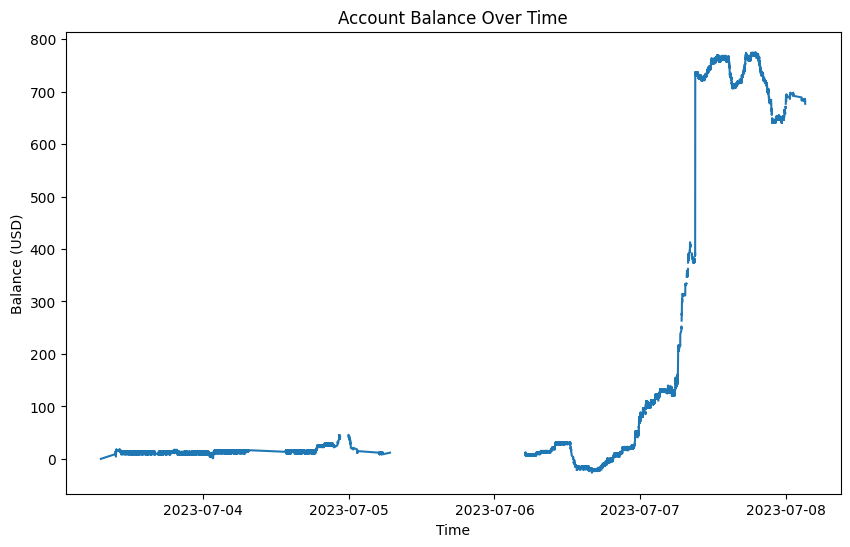

In [98]:
import matplotlib.pyplot as plt

# Assume an initial balance
initial_balance = 0  # USD

# Initialize a list to hold balance over time
balance_over_time = [initial_balance]

# Iterate over filled orders
for index, row in filled_orders.iterrows():
    order_cost = row['price'] * row['executedQty']
    if row['side'] == 'BUY':
        initial_balance -= order_cost
    elif row['side'] == 'SELL':
        initial_balance += order_cost
    balance_over_time.append(initial_balance)

# Create a DataFrame for plotting
df_balance = pd.DataFrame(balance_over_time, columns=['Balance'])
df_balance['Time'] = pd.to_datetime(filled_orders['time'], unit='ms')

# Set Time as the index for the DataFrame
df_balance.set_index('Time', inplace=True)

# Plotting
plt.figure(figsize=(10,6))
plt.plot(df_balance.index, df_balance['Balance'])
plt.xlabel('Time')
plt.ylabel('Balance (USD)')
plt.title('Account Balance Over Time')
plt.show()


this plot is basically USDT balance of the acount. The open orders don't show up (it's based on filled orders only) so the inital major rise is due to shorting BTC. If you have open positions, they're basically loss on this plot since they need an initial buy/sell at a loss and then a second trade to collect the previous trade and the extra profit. Why the balance of the account is negetive at some point? 

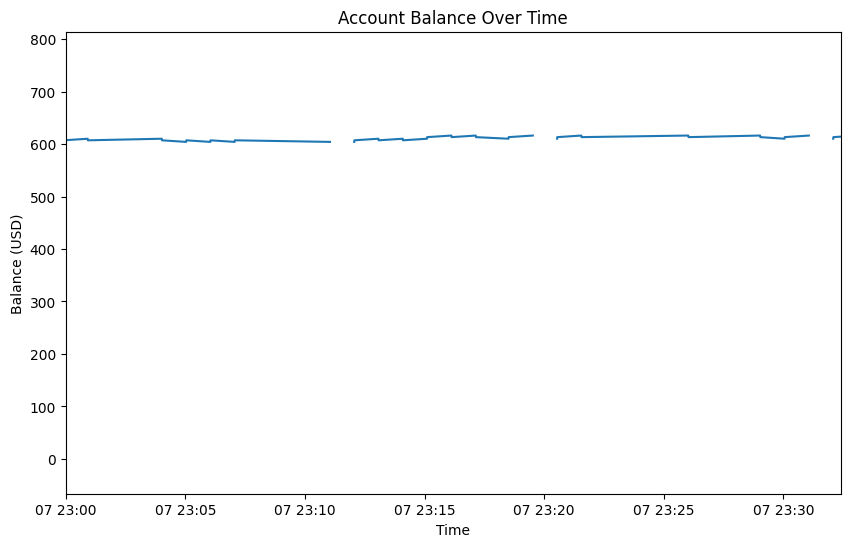

In [52]:
import datetime

# Determine the time range
now = datetime.datetime.now()
start_time = datetime.datetime(now.year, now.month, now.day, 23, 0) - datetime.timedelta(days=1) # 11 PM last night
end_time = now - datetime.timedelta(hours=2)  # 2 hours ago

# Plotting
plt.figure(figsize=(10,6))
plt.plot(df_balance.index, df_balance['Balance'])
plt.xlabel('Time')
plt.ylabel('Balance (USD)')
plt.title('Account Balance Over Time')

# Set the limits of x-axis
plt.xlim([start_time, end_time])

plt.show()


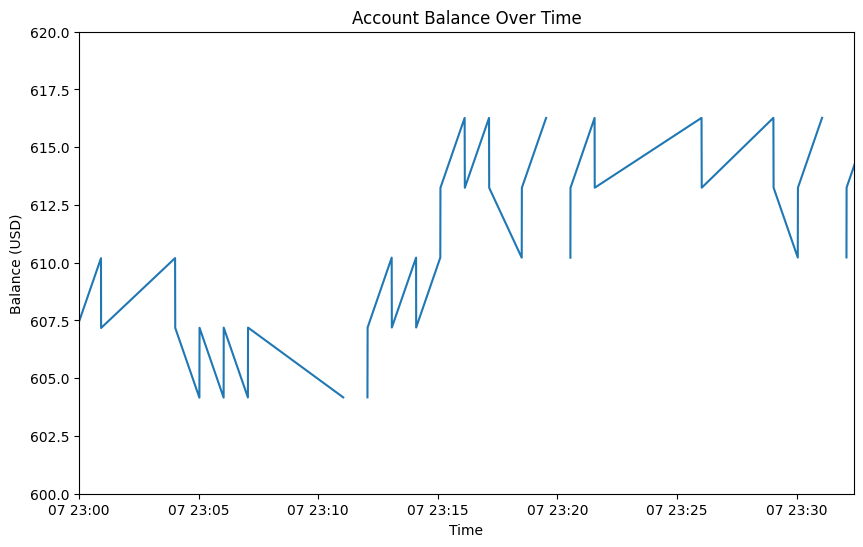

In [57]:
# Determine the range of y values
min_balance = df_balance['Balance'].min()
max_balance = df_balance['Balance'].max()

# Calculate new limits
y_lower = 600
y_upper = 620

# Plotting
plt.figure(figsize=(10,6))
plt.plot(df_balance.index, df_balance['Balance'])
plt.xlabel('Time')
plt.ylabel('Balance (USD)')
plt.title('Account Balance Over Time')

# Set the limits of x-axis
plt.xlim([start_time, end_time])

# Set the limits of y-axis
plt.ylim([y_lower, y_upper])

plt.show()


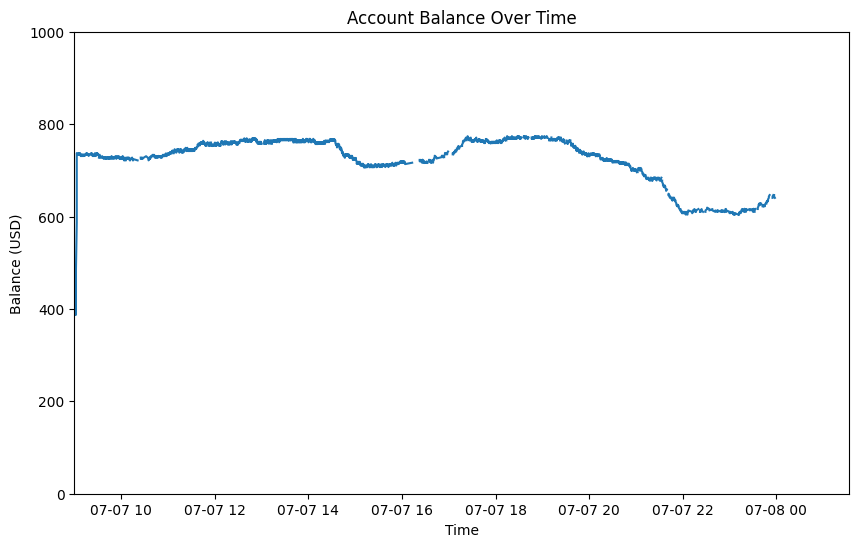

In [68]:
import datetime

# Determine the time range
now = datetime.datetime.now()
start_time = datetime.datetime(now.year, now.month, now.day, 9, 0) - datetime.timedelta(days=1) # 9 AM yesterday
end_time = now - datetime.timedelta(minutes=5)  # 1 hours ago
# Calculate new limits
y_lower = 0
y_upper = 1000

# Plotting
plt.figure(figsize=(10,6))
plt.plot(df_balance.index, df_balance['Balance'])
plt.xlabel('Time')
plt.ylabel('Balance (USD)')
plt.title('Account Balance Over Time')

# Set the limits of x-axis
plt.xlim([start_time, end_time])
# Set the limits of x-axis
plt.xlim([start_time, end_time])
# Set the limits of y-axis
plt.ylim([y_lower, y_upper])
plt.show()

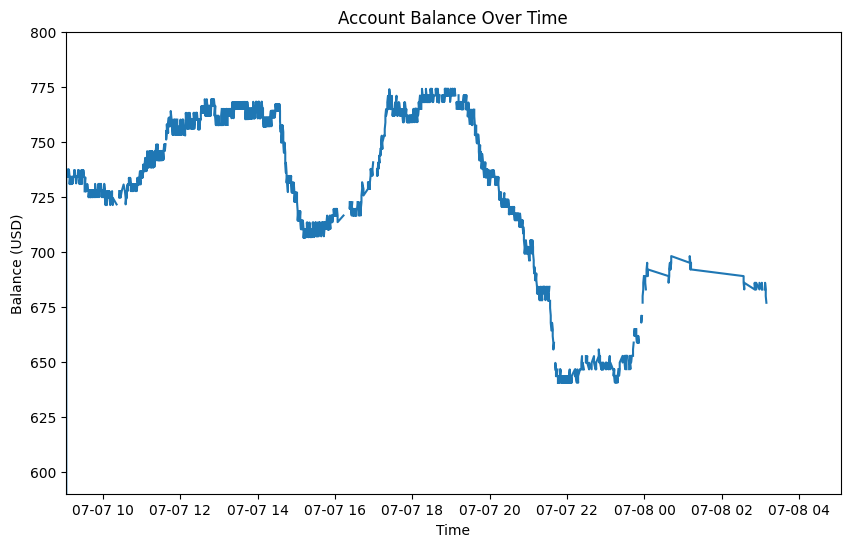

In [105]:
import datetime
import pytz

# Determine the time range
utc_now = datetime.datetime.now(pytz.utc)
start_time_utc = datetime.datetime(utc_now.year, utc_now.month, utc_now.day, 2, 2) - datetime.timedelta(days=1) # 9 AM yesterday UTC

# Convert to PST
pst = pytz.timezone('America/Los_Angeles')  # 'America/Los_Angeles' is the tz database name for Pacific Time
start_time_pst = start_time_utc.astimezone(pst)
end_time_pst = utc_now.astimezone(pst) - datetime.timedelta(hours=4)  # 5 minutes ago

# Calculate new limits
y_lower = 590
y_upper = 800

# Plotting
plt.figure(figsize=(10,6))
plt.plot(df_balance.index, df_balance['Balance'])
plt.xlabel('Time')
plt.ylabel('Balance (USD)')
plt.title('Account Balance Over Time')

# Set the limits of x-axis
plt.xlim([start_time_pst, end_time_pst])

# Set the limits of y-axis
plt.ylim([y_lower, y_upper])

plt.show()